In [1]:

#Spam Classification

import pandas as pd
df= pd.read_csv("spam.csv", encoding='latin-1')
df.shape


(5572, 5)

In [2]:
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3764,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN
2388,ham,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...,NaN,NaN,NaN
184,ham,Going on nothing great.bye,NaN,NaN,NaN
371,ham,I will spoil you in bed as well :),NaN,NaN,NaN
5055,ham,Goodnight da thangam I really miss u dear.,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#check missing values coloumn wisw
df.isnull().any(axis=0)

v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [6]:
#in total hoe many null values are there

In [7]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# how may duplicates values are there 
df.duplicated().sum()

403

In [9]:
#what are the coloumns 
df.columns.to_list()

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [10]:
#data Analisys
#1.datacleaning
#2.EDA
#3.Text pre-preprocessing
#4.Build your own model 
#5.Evaluate the performance of the model 
#6. Improvment of the model
#7.Deploy your application to the cloud 

### data cleaning

In [11]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [12]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [13]:
#fetch the value of each category in target coloumn
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f2b126cc640>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41')])

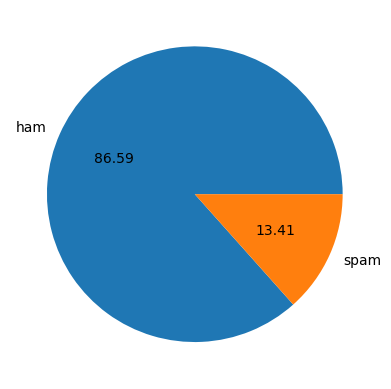

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')

In [15]:
#convert the obeject data into numeric data
#nos One hot encoder ,Label Encoder,map Function,pd.getDummies
# text:numeric->bow,tfidf,word2vec ,contionuis bag of words ,skipgram,sent2vec

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
#find the number of characters in each sentence ,words in each sentence and number of senetences and  make a new coloum of them 

In [19]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [20]:
df.duplicated().sum()

403

In [21]:

df=df.drop_duplicates()

In [22]:
df.shape

(5169, 2)

In [23]:
df.duplicated().sum()

0

([<matplotlib.patches.Wedge at 0x7f2b0e60d970>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

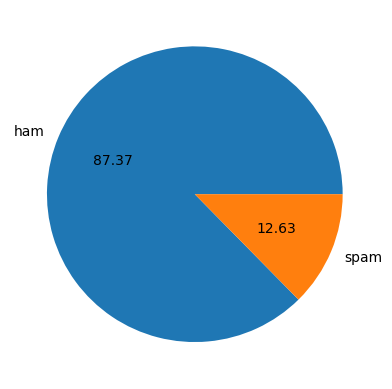

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')

In [25]:
#create 3 new features out of the text features
#create total number of the characters
df['total_chars']=df['text'].apply(len)
df.head(4)

,target,text,total_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49


In [26]:
from nltk.tokenize import sent_tokenize,word_tokenize


In [27]:
df['total_words']=df['text'].apply(lambda x:len(word_tokenize(x)))
df['total_sent']=df['text'].apply(lambda x:len(sent_tokenize(x)))

In [28]:
df.head()

,target,text,total_chars,total_words,total_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
##2.EDA
##pie
#histplot
##pairplot

In [30]:
df[['total_chars','total_words','total_sent']].describe()
    

,total_chars,total_words,total_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#ham
df[df['target']==0][['total_chars','total_words','total_sent']].describe()


,total_chars,total_words,total_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# write a function to lower the text 
#remove the stop words 
#remove punctuation symbols ,
#convert list to String,stemming and lemmentization

In [33]:
df.head

<bound method NDFrame.head of       target                                               text  total_chars  \
0          0  Go until jurong point, crazy.. Available only ...          111   
1          0                      Ok lar... Joking wif u oni...           29   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3          0  U dun say so early hor... U c already then say...           49   
4          0  Nah I don't think he goes to usf, he lives aro...           61   
...      ...                                                ...          ...   
5567       1  This is the 2nd time we have tried 2 contact u...          161   
5568       0              Will Ì_ b going to esplanade fr home?           37   
5569       0  Pity, * was in mood for that. So...any other s...           57   
5570       0  The guy did some bitching but I acted like i'd...          125   
5571       0                         Rofl. Its true to its name           26   

      tot

In [34]:
#Lowering the case of the text coloum 
df['text']=df['text'].apply(str.lower)
df.head()


,target,text,total_chars,total_words,total_sent
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [35]:
#removing stop words and punctutation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ritik1302/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
#removing stop words
stop_words=stopwords.words('english')
df['text']=df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))


In [37]:
#removing punctuation
df['text']=df['text'].str.replace('[^\w\s]','')


/tmp/ipykernel_134323/2182083652.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[^\w\s]','')


In [40]:
#Lemmentization 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
      words = text.split()
      words = [lemmatizer.lemmatize(word,pos='v') for word in words]
      return ' '.join(words)
df['text']=df['text'].apply(lemmatize_words)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:

tfidf=TfidfVectorizer()



In [45]:
x=tfidf.fit_transform(df['text']).toarray()

In [46]:
x


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
model_mnb=MultinomialNB()

In [52]:
model_mnb.fit(x_train,y_train)

MultinomialNB()

In [54]:
y_pred_mnb=model_mnb.predict(x_test)
y_pred_mnb

array([0, 0, 0, ..., 1, 0, 0])

In [57]:
from sklearn.metrics import accuracy_score,precision_score
print("accuracy score :- ",accuracy_score(y_test,y_pred_mnb))
print("precision score :- ",precision_score(y_test,y_pred_mnb))

accuracy score :-  0.9584139264990329
precision score :-  1.0
